<a href="https://colab.research.google.com/github/fxnnxc/class-MachineLearning/blob/master/Assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 06

Logistic regression for a binary classification with a non-linear classification boundary

## 1. Codes

In [0]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
# haperparameters 

tht = [0]*13 # theta for function 
lr = 0.0001

In [0]:
# define Functions
import math

def sigmoid(x): #시그모이드 함수
    return 1/(1+math.exp(-x))

def G(x,y): #x,y에 대한 모델 
  return tht[0] + tht[1]*x + tht[2]*y + tht[3]*x*y + tht[4]*x**2 + tht[5]*y**2 + tht[6]*y*x**2 + tht[7]*x*y**2 + tht[8]*x**3 + tht[9]*x**3+tht[10]*x*y**3+ tht[11]*y*x**3 + tht[12]*(x**2)*(y**2)
  
def loss(data): #세타값에 대한 데이터의 로스
    Z = [( G(d[0], d[1]) ,int(d[2])) for d in data] 
    return sum([-z[1]*math.log(sigmoid(z[0]))-(1-z[1])*math.log(1-sigmoid(z[0])) for z in Z])/len(Z)

def calculate_acc(data):#데이터에 대한 정확도 계산
  correct = 0
  for d in data:
    if sigmoid(G(d[0],d[1]))>=1/2:
      if d[2]==1:
        correct +=1
    else:
      if d[2]==0:
        correct +=1
  return correct/len(data)

In [0]:
# read the data
data = np.genfromtxt("data6.txt", delimiter=',')

pointX = data[:,0]
pointY = data[:,1]
label = data[:,2]

# Store each labels for plot 
pointX0 =pointX[label==0]
pointX1 =pointX[label==1]
pointY0 =pointY[label==0]
pointY1 =pointY[label==1]

In [0]:
# Training with GD

J  = loss(data)
LOSS = [J]
ACC = []
tht_buffer = [0]*13 # 변할 값을 저장해서 한 번에 바꾼다. 

while True:
  temp = J
  M = len(data)
  # Update Theta
  tht_buffer[0] = tht[0] - lr* sum([sigmoid(G(d[0],d[1])) - d[2] for d in data])/M
  tht_buffer[1] = tht[1] - lr* sum([(sigmoid(G(d[0],d[1])) - d[2])*d[0] for d in data])/M
  tht_buffer[2] = tht[2] - lr* sum([(sigmoid(G(d[0],d[1])) - d[2])*d[1] for d in data])/M
  tht_buffer[3] = tht[3] - lr* sum([(sigmoid(G(d[0],d[1])) - d[2])*d[0]*d[1] for d in data])/M
  tht_buffer[4] = tht[4] - lr* sum([(sigmoid(G(d[0],d[1])) - d[2])*d[0]**2 for d in data])/M
  tht_buffer[5] = tht[5] - lr* sum([(sigmoid(G(d[0],d[1])) - d[2])*d[1]**2 for d in data])/M
  tht_buffer[6] = tht[6] - lr* sum([(sigmoid(G(d[0],d[1])) - d[2])*d[1]*d[0]**2 for d in data])/M
  tht_buffer[7] = tht[7] - lr* sum([(sigmoid(G(d[0],d[1])) - d[2])*d[0]*d[1]**2 for d in data])/M
  tht_buffer[8] = tht[8] - lr* sum([(sigmoid(G(d[0],d[1])) - d[2])*d[0]**3 for d in data])/M
  tht_buffer[9] = tht[9] - lr* sum([(sigmoid(G(d[0],d[1])) - d[2])*d[1]**3 for d in data])/M
  tht_buffer[10] = tht[10] - lr* sum([(sigmoid(G(d[0],d[1])) - d[2])*d[0]*d[1]**3 for d in data])/M
  tht_buffer[11] = tht[11] - lr* sum([(sigmoid(G(d[0],d[1])) - d[2])*d[1]*d[0]**3 for d in data])/M
  tht_buffer[12] = tht[12] - lr* sum([(sigmoid(G(d[0],d[1])) - d[2])*(d[0]**2)*(d[1]**2) for d in data])/M
  
  tht = tht_buffer[:]

  ACC.append(calculate_acc(data))
  # Update and Store Loss
  J = loss(data)
  LOSS.append(J)
  if abs(J-LOSS[len(LOSS)-2])  < 1e-7: # Convergence
    break

In [0]:
# Contour
X_mesh, Y_mesh = np.meshgrid(np.linspace(-1.2,1.2, 100),
                     np.linspace(-1.2, 1.2, 100))
Z = []
g = G(X_mesh, Y_mesh)
for g1 in g:
  Z.append([sigmoid(g2) for g2 in g1])

# Decision Boundary
DX= []
DY= []
DecisionBoundary = []
for x in  np.arange(-1, 1,0.001):
  for y in  np.arange(-1, 1,0.001):
    if abs(sigmoid(G(x,y)))<=0.001:
      DX.append(x)
      YY.append(y)
    


# 2. Results

### (1) Plotting the training data

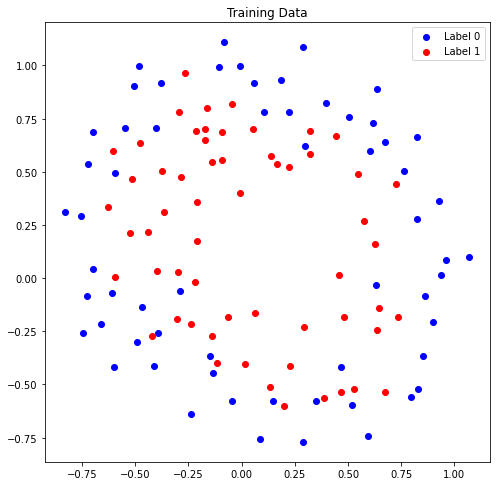

In [7]:
# 1. Plot the training data

plt.figure(figsize=(7,7))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Training Data')
plt.legend(['Label 0', 'Label 1'])
plt.show()

### (2) High dimentional function $g(X,Y, \theta)$

* $\theta_0$  ~ $\theta_{12}$ 
* $g(X,Y, \theta) =  \theta_0 + \theta_1 x  + \theta_2 y + \theta_3 xy + \theta_4 x^2 + \theta_5 y^2 + \theta_6 x^2y + \theta_7 xy^2  + \theta_8 x^3 + \theta_9 y^3 + \theta_{10} x^3y + \theta_{11} xy^3 + \theta_{12} x^2y^2   $

**Partial derivatives**


* ${{\partial g(X,Y, \theta)} \over {\partial\theta_0 }}= 1 $, 
${{\partial g(X,Y, \theta)} \over {\partial\theta_1 }} = x $

* ${{\partial g(X,Y, \theta)} \over {\partial\theta_2 }} = y $
, ${{\partial g(X,Y, \theta)} \over {\partial\theta_3 }} = xy $

* ${{\partial g(X,Y, \theta)} \over {\partial\theta_4 }} = x^2 $
, ${{\partial g(X,Y, \theta)} \over {\partial\theta_5 }} = y^2 $

* ${{\partial g(X,Y, \theta)} \over {\partial\theta_6 }} = x^2y $
, ${{\partial g(X,Y, \theta)} \over {\partial\theta_7 }} = xy^2 $

* ${{\partial g(X,Y, \theta)} \over {\partial\theta_8 }} = x^3 $
, ${{\partial g(X,Y, \theta)} \over {\partial\theta_9 }} = y^3 $

* ${{\partial g(X,Y, \theta)} \over {\partial\theta_{10}}}  = xy^3 $
, ${{\partial g(X,Y, \theta)} \over {\partial\theta_{11}}}  = yx^3 $

* ${{\partial g(X,Y, \theta)} \over {\partial\theta_{12}}} = x^2y^2 $


### (3) Plot the training error

plot the training error   at every iteration of gradient descent until convergence (in blue color)

Text(0.5, 1.0, 'Error Using Training Data')

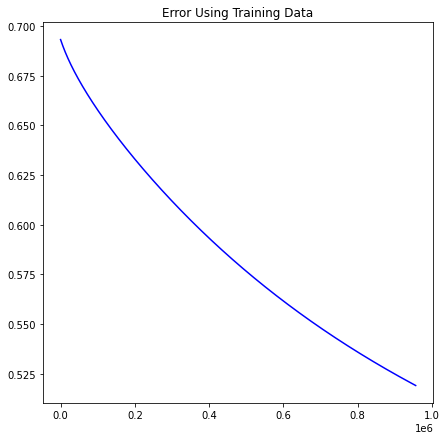

In [8]:
# LOSS 변수에 저장된 에러를 플롯

plt.figure(figsize=(7,7))
plt.plot(LOSS, color='blue')
plt.title('Error Using Training Data')

### (4) Plot the training accuracy [3pt]
training accuracy at every iteration of gradient descent until convergence

Text(0.5, 1.0, 'Training Accuracy')

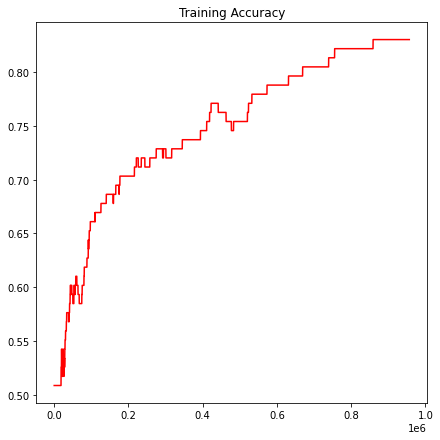

In [9]:
# ACC 변수에 저장된 정확도 플롯

plt.figure(figsize=(7,7))
plt.plot(ACC, color='red')
plt.title('Training Accuracy')

### (5) Final training accuracy.



In [10]:
print("Final Accuracy at convergence: ", ACC[-1])

Final Accuracy at convergence:  0.8305084745762712


### (6) Plot the optimal classifier superimposed on the training data

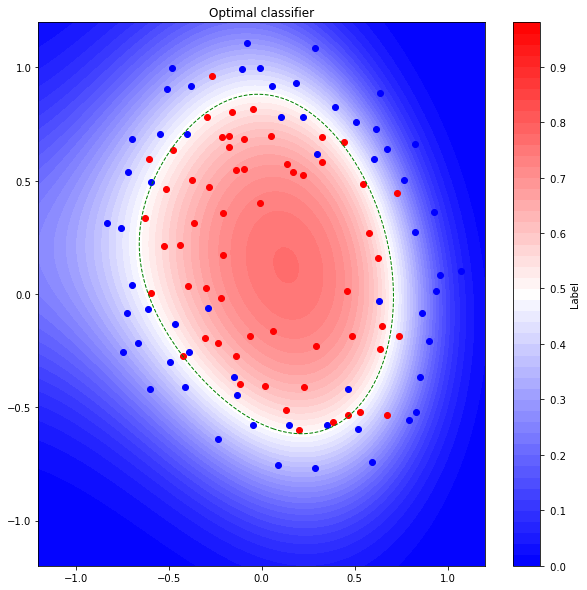

In [11]:
# 6. Plot the optimal classifier superimposed on the training data [5pt
#plot the boundary of the optimal classifier at convergence (in green color) 
#the boundary of the classifier is defined by [~~~] plot the training data points  
# with their labels  in colors superimposed on the illustration of the classifier (blue for label 0 and red for label 1)
# you can use contour function in python3"""

plt.figure(figsize=(10,10))
CS = plt.contourf(X_mesh,Y_mesh,Z, cmap='bwr',  alpha=1,  levels = np.linspace(0,1, 50)) # Colorbar using cmap
plt.title('Optimal classifier')
plt.colorbar(format=' %0.1f', label='Label') # Colorbar Label 추가
plt.scatter(pointX0, pointY0, alpha=1, c='b')
plt.scatter(pointX1, pointY1, alpha=1, c='r')
plt.contour(CS, levels=[0.5], alpha=1,colors=('green',),linestyles=('--',),linewidths=(1,))

# Conclusion

$g(X,Y, \theta) =  $

$1.149 + 0.8619x  + 0.6966 y  -0.7783 xy $

$ -2.524 x^2 -2.2701 y^2  -0.3884 x^2y  -0.2575 xy^2 $

$ -0.2575 x^3 + 0.0525 y^3  -0.1683 x^3y -0.0417 xy^3  -0.7195 x^2y^2   $


해당 Logistic regression for a binary classification 경우, 0.83의 정확도를 지닌다. 

Decision Boundary의 경우, 볼록한 형태를 띄어서 경계 근처에 있는 값에 대해서 정밀하게 값을 파악하진 못한다. 

